In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv(r"C:\Users\USER\Downloads\archive (2)\Unemployment in India.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
data = data.dropna(how='all')

In [6]:
data.isnull().sum()


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [7]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
data.rename(columns={" Estimated Unemployment Rate (%)": "Estimated Unemployment Rate (%)", 
                     ' Date': "Date",
                     " Frequency": "Frequency",
                     " Estimated Employed": "Estimated Employed",
                     ' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)'},
                     inplace=True)


In [9]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
data['Date'] = pd.to_datetime(data['Date'])


C:\Users\USER\AppData\Local\Temp\ipykernel_24480\1258276688.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [12]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [13]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month,day
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9,30


In [14]:
data = data.drop(columns=["Date"])

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(columns=['Estimated Unemployment Rate (%)'])
y = data['Estimated Unemployment Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

In [17]:
cat_cols = list(X_train.select_dtypes(include="object").columns)

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit on training data
X_test = scaler.transform(X_test)

In [19]:
data.dtypes


Region                                      object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
year                                         int32
month                                        int32
day                                          int32
dtype: object

In [20]:
data.apply(lambda col: pd.to_numeric(col, errors='coerce')).isna().sum()


Region                                     740
Frequency                                  740
Estimated Unemployment Rate (%)              0
Estimated Employed                           0
Estimated Labour Participation Rate (%)      0
Area                                       740
year                                         0
month                                        0
day                                          0
dtype: int64

In [21]:
data_encoded = data.copy()
label = LabelEncoder()

for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object' or data_encoded[col].dtype.name == 'category':
        data_encoded[col] = label.fit_transform(data_encoded[col].astype(str))


In [22]:
data_encoded.dtypes


Region                                       int32
Frequency                                    int32
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                         int32
year                                         int32
month                                        int32
day                                          int32
dtype: object

In [23]:
# Train the model 

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=15,
                              random_state=32, splitter= "best", 
                              max_depth= 15, max_features='sqrt', 
                              criterion='friedman_mse', )

model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [24]:
# evaluate the perfomance of the base model 

from sklearn.metrics import root_mean_squared_error

train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

print(f'Train Score: {train_rmse}')
print(f'Test Score: {test_rmse}')

Train Score: 6.3664332139293025
Test Score: 9.285115240555008


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits
 Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 12, 'bootstrap': True}
 Best CV RMSE (Negative): -7.519982403717198
 True CV RMSE: 7.519982403717198
Train RMSE: 4.5317
Test RMSE:  8.6183
 Possible overfitting (train error much lower than test).


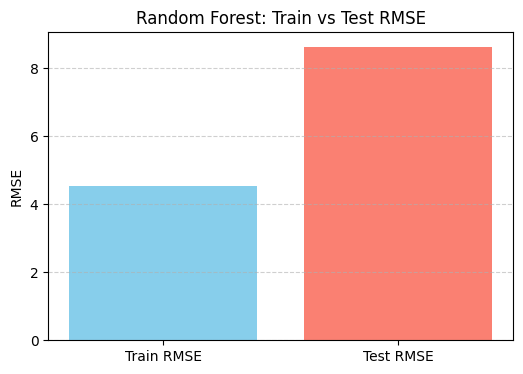

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Define parameter space

param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [10, 12],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]    
}


# Initialize model

rf = RandomForestRegressor(random_state=32)

# Randomized Search CV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                                   
    scoring='neg_root_mean_squared_error',       
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=32
)


# Fit to training data

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_


# Evaluate on train & test

train_pred = best_rf.predict(X_train)
test_pred = best_rf.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))


# Display results

print(" Best Parameters:", random_search.best_params_)
print(" Best CV RMSE (Negative):", random_search.best_score_)
print(" True CV RMSE:", abs(random_search.best_score_))


print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE:  {test_rmse:.4f}")


if train_rmse < test_rmse * 0.8:
    print(" Possible overfitting (train error much lower than test).")
elif test_rmse < train_rmse * 0.8:
    print(" Possible underfitting (test error much lower than train).")
else:
    print(" Model generalizes well between train and test.")

# Visualize Train vs Test RMSE

plt.figure(figsize=(6,4))
plt.bar(['Train RMSE', 'Test RMSE'], [train_rmse, test_rmse], color=['skyblue', 'salmon'])
plt.title('Random Forest: Train vs Test RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
